In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from abides_core import abides
from abides_core.utils import parse_logs_df, ns_date, str_to_ns, fmt_ts
from abides_markets.configs import rmsc05

In [2]:
config = rmsc05.build_config(
    end_time="13:00:00"
)

config.keys()

end_state = abides.run(config)
order_book = end_state["agents"][0].order_books["ABM"]

[31463] INFO abides Simulation Start Time: 2022-10-26 23:21:32.936280
[31463] INFO abides_core.kernel --- Simulation time: 2021-02-05 00:00:00, messages processed: 0, wallclock elapsed: 0.00s ---
[31463] INFO abides_core.kernel Event Queue elapsed: 0:00:18.651666, messages: 86,660, messages per second: 4646.2
[31463] INFO abides_core.kernel Mean ending value by agent type:
[31463] INFO abides_core.kernel NoiseAgent: -187
[31463] INFO abides_core.kernel ValueAgent: 123744
[31463] INFO abides_core.kernel AdaptivePOVMarketMakerAgent: 0
[31463] INFO abides_core.kernel MomentumAgent: -1036269
[31463] INFO abides_core.kernel Simulation ending!
[31463] INFO abides Simulation End Time: 2022-10-26 23:21:56.340853
[31463] INFO abides Time taken to run simulation: 0:00:23.404573


In [3]:
L1 = order_book.get_L1_snapshots()

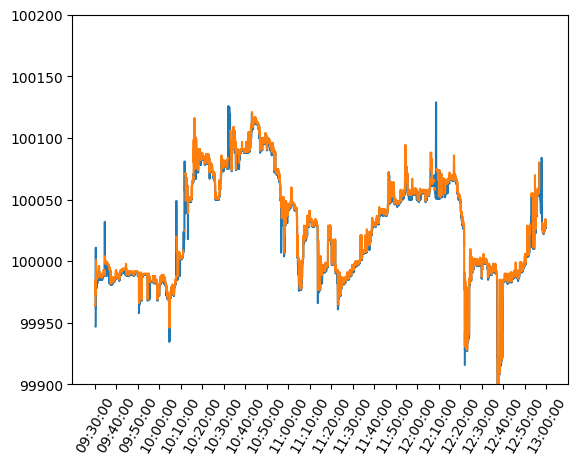

In [4]:
best_bids = pd.DataFrame(L1["best_bids"],columns=["time","price","qty"])
best_asks = pd.DataFrame(L1["best_asks"],columns=["time","price","qty"])

## All times are in ns from 1970, remove the date component to put them in ns from midnight
best_bids["time"] = best_bids["time"].apply( lambda x: x - ns_date(x) )
best_asks["time"] = best_asks["time"].apply( lambda x: x - ns_date(x) )

plt.plot(best_bids.time,best_bids.price)
plt.plot(best_asks.time,best_asks.price)

band = 100
plt.ylim(100_000-band,100_100+band)

time_mesh = np.arange(
    str_to_ns("09:30:00"),
    str_to_ns("13:10:00"),
    1e9*60*10
)
_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

In [5]:
L2 = order_book.get_L2_snapshots(nlevels=10)

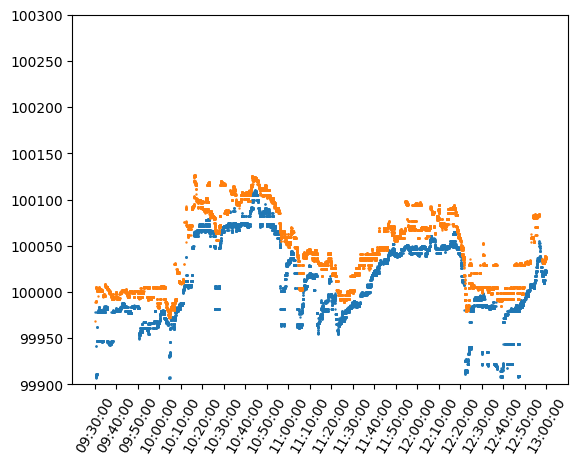

In [6]:
## plotting fifth best bid and fifth best ask
times = [ t - ns_date(t) for t in L2["times"] ]
plt.scatter( times, L2["bids"][:,5,0], s=.5 )
plt.scatter( times, L2["asks"][:,5,0], s=.5 )

band = 100
plt.ylim(100_000-band,100_200+band)

_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

In [7]:
logs_df = parse_logs_df( end_state )

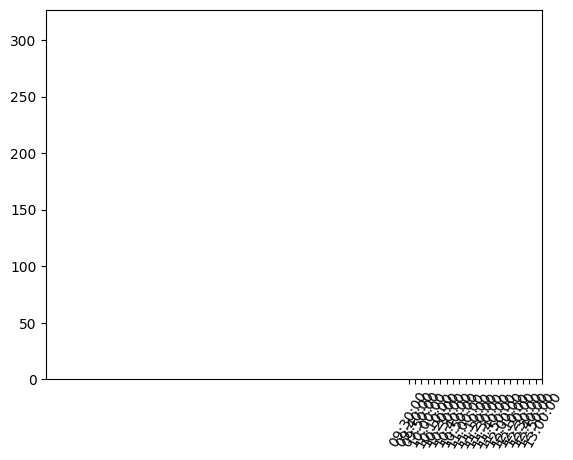

In [8]:
plt.hist( logs_df[ (logs_df.agent_type == "NoiseAgent") & (logs_df.EventType=="ORDER_SUBMITTED") ].EventTime.apply(lambda x: x - ns_date(x) )  )

_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )


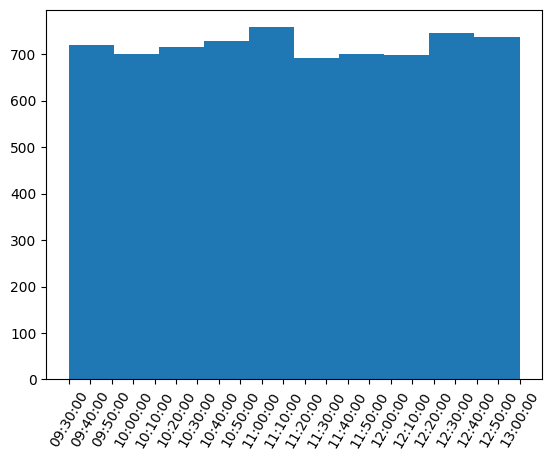

In [9]:
plt.hist( logs_df[ (logs_df.agent_type == "ValueAgent") & (logs_df.EventType=="ORDER_SUBMITTED") ].EventTime.apply(lambda x: x - ns_date(x) )  )

_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

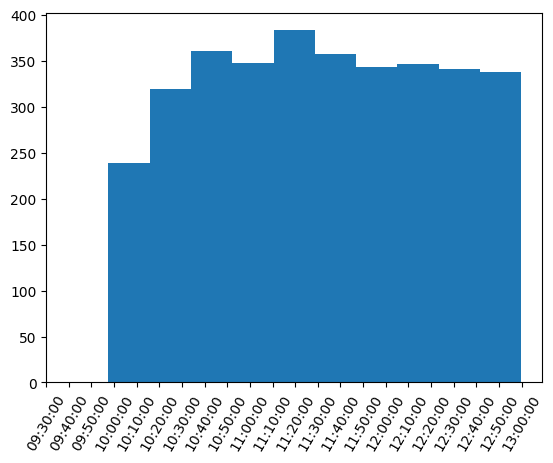

In [10]:
plt.hist( logs_df[ (logs_df.agent_type == "MomentumAgent") & (logs_df.EventType=="ORDER_SUBMITTED") ].EventTime.apply(lambda x: x - ns_date(x) )  )

_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

In [11]:
df = logs_df[(logs_df.agent_type == "MomentumAgent")]
df

,EventTime,EventType,ScalarEventValue,agent_id,agent_type,CASH,time_placed,symbol,quantity,side,order_id,fill_price,tag,limit_price,is_hidden,is_price_to_comply,insert_by_id,is_post_only,fee,ABM
0,0,AGENT_TYPE,MomentumAgent,1105,MomentumAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,STARTING_CASH,10000000,1105,MomentumAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1612483200000000000,HOLDINGS_UPDATED,NaN,1105,MomentumAgent,10000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1612517417646149082,BID_DEPTH,[],1105,MomentumAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1612517417646149082,ASK_DEPTH,"[(99985, 49)]",1105,MomentumAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2903,1612530000000732115,FINAL_HOLDINGS,"{ ABM: 4346, CASH: -425789609 }",1116,MomentumAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2904,1612530000000732115,FINAL_CASH_POSITION,-425789609,1116,MomentumAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2905,1612530000000732115,MARK_TO_MARKET,4346 ABM @ 100029 == 434726034,1116,MomentumAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2906,1612530000000732115,MARKED_TO_MARKET,8936425,1116,MomentumAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df = logs_df[(logs_df.agent_type == "MomentumAgent")]
df_start = df.loc[df['EventType'] == 'STARTING_CASH']
df_start = df_start[['agent_id', 'ScalarEventValue']]
df_end = df.loc[df['EventType'] == 'ENDING_CASH']
df_end = df_end[['agent_id', 'ScalarEventValue']]
df = pd.merge(df_start[['agent_id', 'ScalarEventValue']],
                df_end[['agent_id', 'ScalarEventValue']],
                how='left',
                left_on=['agent_id'],
                right_on=['agent_id'],
                suffixes=['_Open',
                         '_Close'])
df['diff'] = df['ScalarEventValue_Open'] - df['ScalarEventValue_Close']

df


,agent_id,ScalarEventValue_Open,ScalarEventValue_Close,diff
0,1105,10000000,8980561,1019439
1,1106,10000000,8958368,1041632
2,1107,10000000,9068321,931679
3,1108,10000000,8865924,1134076
4,1109,10000000,8994775,1005225
5,1110,10000000,8852241,1147759
6,1111,10000000,9030013,969987
7,1112,10000000,8942165,1057835
8,1113,10000000,9067238,932762
9,1114,10000000,8913776,1086224


In [13]:
df = logs_df[(logs_df.agent_type == "MomentumAgent")]
df = df.loc[df['EventType'] == 'MARKED_TO_MARKET']

df

,EventTime,EventType,ScalarEventValue,agent_id,agent_type,CASH,time_placed,symbol,quantity,side,order_id,fill_price,tag,limit_price,is_hidden,is_price_to_comply,insert_by_id,is_post_only,fee,ABM
2941,1612530000001900970,MARKED_TO_MARKET,8980561,1105,MomentumAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2830,1612530000003227564,MARKED_TO_MARKET,8958368,1106,MomentumAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2952,1612530000003837885,MARKED_TO_MARKET,9068321,1107,MomentumAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3010,1612530000001470884,MARKED_TO_MARKET,8865924,1108,MomentumAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2882,1612530000010156908,MARKED_TO_MARKET,8994775,1109,MomentumAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3342,1612530000005869722,MARKED_TO_MARKET,8852241,1110,MomentumAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2812,1612530000003006144,MARKED_TO_MARKET,9030013,1111,MomentumAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3058,1612530000003410344,MARKED_TO_MARKET,8942165,1112,MomentumAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2754,1612530000001449806,MARKED_TO_MARKET,9067238,1113,MomentumAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3044,1612530000010012056,MARKED_TO_MARKET,8913776,1114,MomentumAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df = logs_df[(logs_df.agent_type == "MomentumAgent")]
#df = logs_df.loc[logs_df['EventType'] == 'MARKET_FEE']

total_fee = df['fee'].sum()
print(round(total_fee / 100, 2))

72233.0


In [15]:
df = logs_df[(logs_df.agent_type == "MomentumAgent")]
df = df.loc[df['EventType'] == 'ORDER_EXECUTED']

df.to_csv('order_executed.csv')

In [16]:
L2 = order_book.get_L2_snapshots(nlevels=10)

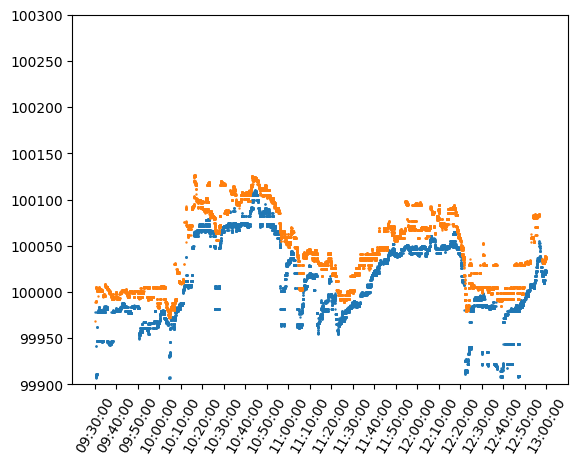

In [17]:
time_mesh = np.arange(
    str_to_ns("09:30:00"),
    str_to_ns("13:10:00"),
    1e9*60*10
)

## plotting fifth best bid and fifth best ask
times = [ t - ns_date(t) for t in L2["times"] ]
plt.scatter( times, L2["bids"][:,5,0], s=.5 )
plt.scatter( times, L2["asks"][:,5,0], s=.5 )

band = 100
plt.ylim(100_000-band,100_200+band)

_=plt.xticks(time_mesh, [ fmt_ts(time).split(" ")[1] for time in time_mesh], rotation=60 )

# Plotting Treemap

In [108]:
df = logs_df[(logs_df.agent_type == "MomentumAgent")]
df_end = df.loc[df['EventType'] == 'ENDING_CASH']

In [171]:
df_end = logs_df[logs_df['EventType'] == 'ENDING_CASH']
df_end

,EventTime,EventType,ScalarEventValue,agent_id,agent_type,CASH,time_placed,symbol,quantity,side,order_id,fill_price,tag,limit_price,is_hidden,is_price_to_comply,insert_by_id,is_post_only,fee,ABM
17,1612530000010968704,ENDING_CASH,9994900,1,NoiseAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,1612530000003083530,ENDING_CASH,10015600,2,NoiseAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,1612530000010072686,ENDING_CASH,10006200,3,NoiseAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1612530000000739072,ENDING_CASH,10000000,4,NoiseAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1612530000006643099,ENDING_CASH,10000000,5,NoiseAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059,1612530000003410344,ENDING_CASH,8942165,1112,MomentumAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2755,1612530000001449806,ENDING_CASH,9067238,1113,MomentumAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3045,1612530000010012056,ENDING_CASH,8913776,1114,MomentumAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2932,1612530000007240608,ENDING_CASH,8954963,1115,MomentumAgent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
df_end.loc[:, "EndingCashAbsolut"]  = df_end["ScalarEventValue"].apply(lambda x: (x - 10_000_000) / 100)
df_end.loc[:, "EndingCashPercentage"]  = df_end["ScalarEventValue"].apply(lambda x: (x - 10_000_000) / (10_000_000))
df_end.loc[:, "PnL"]  = df_end["ScalarEventValue"].apply(lambda x: "positive" if (x - 10_000_000) > 0 else "negative")

/root/Thesis/bachelor/abides-jpmc-public/lambda/lib/python3.7/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/root/Thesis/bachelor/abides-jpmc-public/lambda/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [173]:
df_end

,EventTime,EventType,ScalarEventValue,agent_id,agent_type,CASH,time_placed,symbol,quantity,side,...,limit_price,is_hidden,is_price_to_comply,insert_by_id,is_post_only,fee,ABM,EndingCashAbsolut,EndingCashPercentage,PnL
17,1612530000010968704,ENDING_CASH,9994900,1,NoiseAgent,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-51.00,-0.000510,negative
29,1612530000003083530,ENDING_CASH,10015600,2,NoiseAgent,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.00,0.001560,positive
14,1612530000010072686,ENDING_CASH,10006200,3,NoiseAgent,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.00,0.000620,positive
6,1612530000000739072,ENDING_CASH,10000000,4,NoiseAgent,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.000000,negative
6,1612530000006643099,ENDING_CASH,10000000,5,NoiseAgent,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.000000,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059,1612530000003410344,ENDING_CASH,8942165,1112,MomentumAgent,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10578.35,-0.105784,negative
2755,1612530000001449806,ENDING_CASH,9067238,1113,MomentumAgent,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9327.62,-0.093276,negative
3045,1612530000010012056,ENDING_CASH,8913776,1114,MomentumAgent,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10862.24,-0.108622,negative
2932,1612530000007240608,ENDING_CASH,8954963,1115,MomentumAgent,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-10450.37,-0.104504,negative


In [112]:
import plotly.express as px
import numpy as np

In [176]:
df_end.head()

,EventTime,EventType,ScalarEventValue,agent_id,agent_type,CASH,time_placed,symbol,quantity,side,...,limit_price,is_hidden,is_price_to_comply,insert_by_id,is_post_only,fee,ABM,EndingCashAbsolut,EndingCashPercentage,PnL
17,1612530000010968704,ENDING_CASH,9994900,1,NoiseAgent,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-51.0,-0.00051,negative
29,1612530000003083530,ENDING_CASH,10015600,2,NoiseAgent,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.0,0.00156,positive
14,1612530000010072686,ENDING_CASH,10006200,3,NoiseAgent,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,0.00062,positive
6,1612530000000739072,ENDING_CASH,10000000,4,NoiseAgent,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00000,negative
6,1612530000006643099,ENDING_CASH,10000000,5,NoiseAgent,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00000,negative


-0.1019439

In [177]:
#df = px.data.gapminder().query("year == 2007")
#fig = px.sunburst(df_end, path=['agent_id'], values='EndingCashAbsolut')


df = px.data.tips()
fig = px.treemap(df_end, 
        path=['agent_id'], 
        values='ScalarEventValue', 
        color='PnL', 
        color_discrete_map={'negative':'#cf2d2d', 'positive':'#278024', 'equal':'#616161'},
        title='PnL',
        #subplot_titles = ('test')
        )

agent_type = df_end["agent_type"].iloc
ending_cash_percentages = df_end["EndingCashPercentage"].iloc
ending_cash_absolute = df_end["EndingCashAbsolut"].iloc

for f in fig.data:
        # update the labels
        
        var = []

        for i in range(len(f.labels)):
                var.append(agent_type[i] + "\n" + str(ending_cash_percentages[i]) + "\n" + str(ending_cash_absolute[i]))
            
        f.labels = var


print(fig)

Figure({
    'data': [{'branchvalues': 'total',
              'customdata': array([['negative'],
                                   ['negative'],
                                   ['negative'],
                                   ...,
                                   ['positive'],
                                   ['positive'],
                                   ['positive']], dtype=object),
              'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': ('labels=%{label}<br>ScalarEvent' ... '{customdata[0]}<extra></extra>'),
              'ids': array(['1', '638', '640', ..., '731', '278', '269'], dtype=object),
              'labels': [NoiseAgent -0.00051 -51.0, NoiseAgent 0.00156 156.0,
                         NoiseAgent 0.00062 62.0, ..., MomentumAgent -0.1086224
                         -10862.24, MomentumAgent -0.1045037 -10450.37,
                         MomentumAgent -0.1063575 -10635.75],
              'marker': {'colors': [#cf2d2d, #cf2d2d, #cf

In [178]:
fig